In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [2]:
raw_df = pd.read_csv("../data/SEIFA-2016-by-post-code-cleaned.csv")
post_df = raw_df[["Postal Area Code", "  Rank within State or Territory - Decile"]]
post_df.columns = ["Post Code", "SERank"]
post_df
# raw_df.columns

,Post Code,SERank
0,800,10
1,810,8
2,812,7
3,815,10
4,820,9
...,...,...
2624,7466,4
2625,7467,1
2626,7468,6
2627,7469,1


In [3]:
post_df["Post Code"].nunique()

2629

In [4]:
post_df["SERank"].value_counts()

9     267
7     266
3     266
5     265
6     263
2     262
8     261
4     261
1     259
10    259
Name: SERank, dtype: int64

In [5]:
seifa_df = pd.read_csv("../data/cleaned_data_schoolattendancerate_seifa.csv")
seifa_df

,School Code,School,Attendance Year,School Type,School Category,Remoteness Area,Region,Local Government Area,State Electorate,FTE Days Attended,Possible Attendance Days,Attendance Rate,SEIFA Territory Percentile,Official Low Year Level,Official High Year Level,Suburb,Post Code,All Student Count,Longitude,Latitude
0,591,Abercorn State School,2015,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1987.5,2103.0,94.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
1,591,Abercorn State School,2016,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1632.5,1705.0,95.7,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
2,591,Abercorn State School,2017,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1405.0,1440.0,97.6,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
3,591,Abercorn State School,2018,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1640.0,1700.0,96.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
4,591,Abercorn State School,2019,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1657.5,1728.0,95.9,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,275,Zillmere State School,2015,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,11786.0,12919.0,91.2,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673
6105,275,Zillmere State School,2016,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,12816.5,13956.0,91.8,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673
6106,275,Zillmere State School,2017,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,11195.0,12314.0,90.9,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673
6107,275,Zillmere State School,2018,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,12004.0,13503.0,88.9,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673


In [6]:
combine_df = seifa_df.merge(post_df, how="left", on="Post Code")
combine_df

,School Code,School,Attendance Year,School Type,School Category,Remoteness Area,Region,Local Government Area,State Electorate,FTE Days Attended,...,Attendance Rate,SEIFA Territory Percentile,Official Low Year Level,Official High Year Level,Suburb,Post Code,All Student Count,Longitude,Latitude,SERank
0,591,Abercorn State School,2015,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1987.5,...,94.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955,2.0
1,591,Abercorn State School,2016,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1632.5,...,95.7,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955,2.0
2,591,Abercorn State School,2017,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1405.0,...,97.6,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955,2.0
3,591,Abercorn State School,2018,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1640.0,...,96.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955,2.0
4,591,Abercorn State School,2019,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1657.5,...,95.9,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,275,Zillmere State School,2015,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,11786.0,...,91.2,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673,8.0
6105,275,Zillmere State School,2016,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,12816.5,...,91.8,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673,8.0
6106,275,Zillmere State School,2017,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,11195.0,...,90.9,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673,8.0
6107,275,Zillmere State School,2018,State School,Primary,Major Cities of Australia,Metropolitan,Brisbane (C),Aspley,12004.0,...,88.9,78.0,Prep Year,Year 6,Zillmere,4034,130.0,153.037355,-27.364673,8.0


In [7]:
rank_stats = combine_df[["Post Code", "SERank", "Attendance Rate"]]
rank_stats

,Post Code,SERank,Attendance Rate
0,4627,2.0,94.5
1,4627,2.0,95.7
2,4627,2.0,97.6
3,4627,2.0,96.5
4,4627,2.0,95.9
...,...,...,...
6104,4034,8.0,91.2
6105,4034,8.0,91.8
6106,4034,8.0,90.9
6107,4034,8.0,88.9


In [8]:
rank_stats.dtypes


Post Code            int64
SERank             float64
Attendance Rate    float64
dtype: object

In [9]:
rank_stats["SERank"].isnull().sum()

10

In [10]:
rank_stats["Attendance Rate"].isnull().sum()

0

In [11]:
rank_stats.dropna(axis=0, inplace=True)
rank_stats["SERank"].isnull().sum()

C:\Users\Natalie Manahan\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

In [12]:
def plot_linear_regression(x_values, y_values, xlab, ylab, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot Scatter
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    print(f"The r-value is: {rvalue**2} pvalue: {pvalue}")
    plt.show()
    

The r-value is: 0.08033250297152289 pvalue: 4.838562723842561e-113


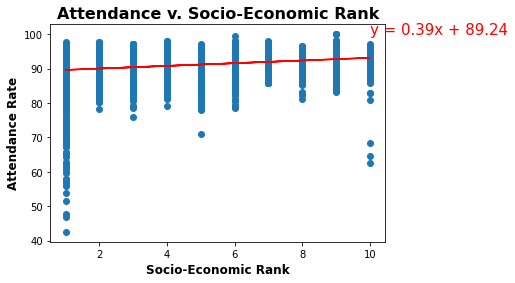

<Figure size 432x288 with 0 Axes>

In [13]:
y_values = rank_stats["Attendance Rate"]
x_values = rank_stats["SERank"]

plt.title('Attendance v. Socio-Economic Rank', fontsize=16, fontweight='bold')
plt.xlabel('Socio-Economic Rank', fontsize=12, fontweight='bold')
plt.ylabel('Attendance', fontsize=12, fontweight='bold')

plot_linear_regression(x_values, y_values, "Socio-Economic Rank", 'Attendance Rate', (10, 100))

plt.savefig("../data/Fig5_Part3.png")



In [14]:
# First decile, remotness area and region

rank_stats2 = combine_df[["Post Code", 'SERank', 'Attendance Rate', 'Remoteness Area', 'Region']]
rank_stats2

,Post Code,SERank,Attendance Rate,Remoteness Area,Region
0,4627,2.0,94.5,Outer Regional Australia,Central Queensland
1,4627,2.0,95.7,Outer Regional Australia,Central Queensland
2,4627,2.0,97.6,Outer Regional Australia,Central Queensland
3,4627,2.0,96.5,Outer Regional Australia,Central Queensland
4,4627,2.0,95.9,Outer Regional Australia,Central Queensland
...,...,...,...,...,...
6104,4034,8.0,91.2,Major Cities of Australia,Metropolitan
6105,4034,8.0,91.8,Major Cities of Australia,Metropolitan
6106,4034,8.0,90.9,Major Cities of Australia,Metropolitan
6107,4034,8.0,88.9,Major Cities of Australia,Metropolitan


In [15]:
decile1_stats = rank_stats2.loc[rank_stats2['SERank'] <2, :]
decile1_stats

,Post Code,SERank,Attendance Rate,Remoteness Area,Region
45,4650,1.0,91.5,Inner Regional Australia,North Coast
46,4650,1.0,92.2,Inner Regional Australia,North Coast
47,4650,1.0,92.0,Inner Regional Australia,North Coast
48,4650,1.0,90.2,Inner Regional Australia,North Coast
49,4650,1.0,88.2,Inner Regional Australia,North Coast
...,...,...,...,...,...
6059,4388,1.0,91.9,Outer Regional Australia,Darling Downs South West
6060,4388,1.0,93.7,Outer Regional Australia,Darling Downs South West
6061,4388,1.0,91.3,Outer Regional Australia,Darling Downs South West
6062,4388,1.0,91.3,Outer Regional Australia,Darling Downs South West


In [16]:
decile1_stats["Remoteness Area"].value_counts()

Outer Regional Australia     200
Inner Regional Australia     165
Major Cities of Australia    105
Very Remote Australia        100
Remote Australia              70
Name: Remoteness Area, dtype: int64

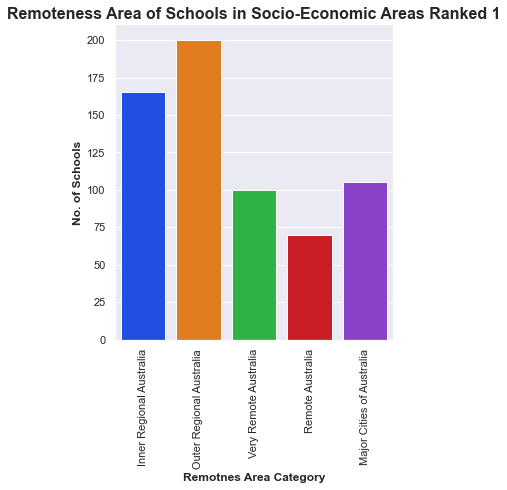

In [17]:
# plot (histogram) First decile Remoteness Area
sns.set(style='darkgrid')
sns.catplot(x='Remoteness Area', kind='count', data=decile1_stats, palette="bright")
plt.title('Remoteness Area of Schools in Socio-Economic Areas Ranked 1', fontsize=16, fontweight='bold')
plt.xlabel('Remotnes Area Category', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('No. of Schools', fontsize=12, fontweight='bold')

plt.savefig("../data/Fig4_Part3.png")

In [18]:
decile1_stats["Region"].value_counts()

North Coast                 170
Far North Queensland        155
Darling Downs South West     90
North Queensland             85
South East                   60
Central Queensland           45
Metropolitan                 35
Name: Region, dtype: int64

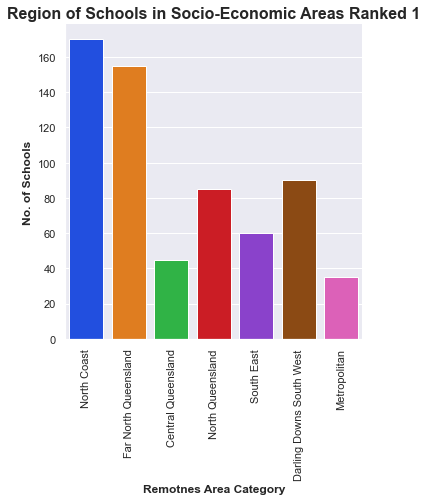

In [19]:
# plot (histogram) First decile
sns.set(style='darkgrid')
sns.catplot(x='Region', kind='count', data=decile1_stats, palette="bright")
plt.title('Region of Schools in Socio-Economic Areas Ranked 1', fontsize=16, fontweight='bold')
plt.xlabel('Remotnes Area Category', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('No. of Schools', fontsize=12, fontweight='bold')

plt.savefig("../data/Fig3_Part3.png")

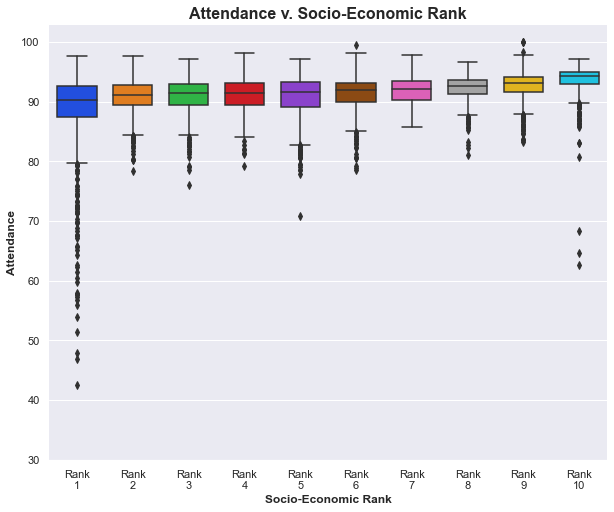

In [20]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(10,8))
xvalues = ['Rank\n1', 'Rank\n2', 'Rank\n3','Rank\n4','Rank\n5','Rank\n6','Rank\n7','Rank\n8','Rank\n9','Rank\n10',]

box_graph = sns.boxplot(x='SERank', y='Attendance Rate', data=rank_stats, width=0.7, palette="bright")
plt.title('Attendance v. Socio-Economic Rank', fontsize=16, fontweight='bold')
plt.xlabel('Socio-Economic Rank', fontsize=12, fontweight='bold')
plt.ylabel('Attendance', fontsize=12, fontweight='bold')


plt.xticks(np.arange(10), xvalues)
plt.yticks(np.arange(30, 110, 10))


sns.despine(top=True,
           right=True,
           left=True,
           bottom=False)


plt.savefig("../data/Fig1_Part3.png")


In [21]:
SErank2_10 = rank_stats.loc[rank_stats['SERank'] >1, :]
SErank2_10 

,Post Code,SERank,Attendance Rate
0,4627,2.0,94.5
1,4627,2.0,95.7
2,4627,2.0,97.6
3,4627,2.0,96.5
4,4627,2.0,95.9
...,...,...,...
6104,4034,8.0,91.2
6105,4034,8.0,91.8
6106,4034,8.0,90.9
6107,4034,8.0,88.9


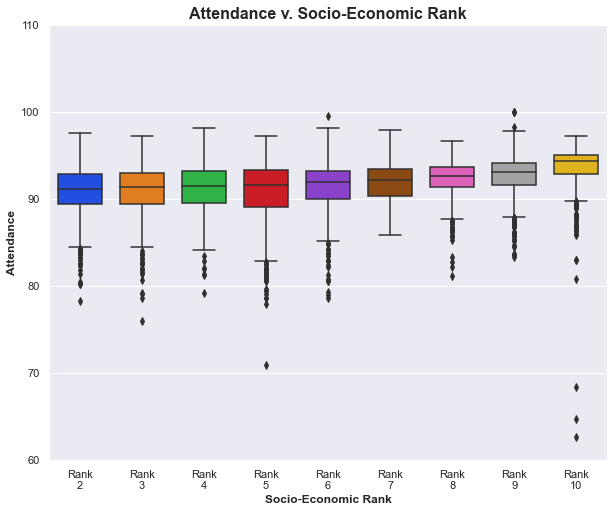

In [22]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(10,8))
box_graph = sns.boxplot(x='SERank', y='Attendance Rate', data=SErank2_10, width=0.7, palette="bright")
plt.title('Attendance v. Socio-Economic Rank', fontsize=16, fontweight='bold')
plt.xlabel('Socio-Economic Rank', fontsize=12, fontweight='bold')
plt.ylabel('Attendance', fontsize=12, fontweight='bold')

xvalues = ['Rank\n2', 'Rank\n3','Rank\n4','Rank\n5','Rank\n6','Rank\n7','Rank\n8','Rank\n9','Rank\n10',]

plt.xticks(np.arange(9), xvalues)
plt.yticks(np.arange(60, 120, 10))

plt.savefig("../data/Fig2_Part3.png")